## Load Packages

In [221]:
from sklearn.neighbors.kde import KernelDensity
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.nonparametric.smoothers_lowess import lowess

## Load Dataset

In [10]:
df = pd.read_stata("/Users/YaoJunyan/Documents/NYU/Fall 2016/Growth Curve/Database/drvisits_project_ver13.dta")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 13 columns):
id          1948 non-null float32
numvisit    1948 non-null float32
age         1948 non-null float32
educ        1948 non-null float32
married     1948 non-null float32
badh        1948 non-null float32
loginc      1948 non-null float32
reform      1948 non-null float32
summer      1948 non-null float32
runif       1948 non-null float32
munif       1948 non-null float32
rank        1948 non-null float32
mx          1948 non-null float32
dtypes: float32(13)
memory usage: 114.1 KB


In [13]:
df.head()

,id,numvisit,age,educ,married,badh,loginc,reform,summer,runif,munif,rank,mx
0,4.0,9.0,53.0,9.0,1.0,1.0,7.699212,0.0,0.0,0.351143,0.351143,610.0,2165.0
1,7.0,40.0,48.0,10.5,0.0,1.0,7.057358,0.0,0.0,0.254096,0.254096,394.0,2165.0
2,22.0,1.0,40.0,10.5,0.0,0.0,7.541466,0.0,0.0,0.593426,0.339249,569.0,2165.0
3,22.0,1.0,42.0,10.5,1.0,0.0,7.331879,1.0,0.0,0.085072,0.339249,569.0,2165.0
4,26.0,0.0,57.0,10.5,0.0,1.0,7.428922,0.0,0.0,0.836668,0.836668,1941.0,2165.0


## Evaluate the need for transformation of the outcome, numvisit by examining a kdensity plot with a normal distribution superimposed

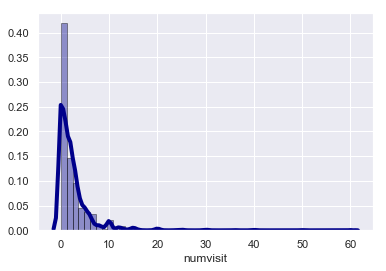

In [17]:
sns.distplot(df['numvisit'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

This below kernel plot imposed Gausian distribution

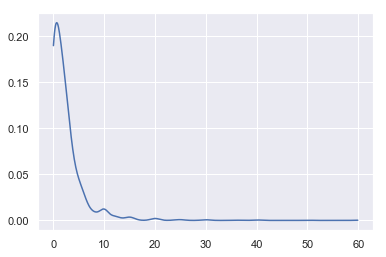

In [47]:
from scipy import stats
data = df['numvisit']
density = stats.kde.gaussian_kde(data)
x = np.arange(0., 60, .1)
plt.plot(x, density(x))
plt.show()

We can see from this plot, the numvisit variable is highly skewed. So log transformation is needed

In [49]:
df['lnvisit'] = np.log(df['numvisit']+1) # add 1 in case some of numvisit is 0

In [50]:
df.head()

,id,numvisit,age,educ,married,badh,loginc,reform,summer,runif,munif,rank,mx,lnvisit
0,4.0,9.0,53.0,9.0,1.0,1.0,7.699212,0.0,0.0,0.351143,0.351143,610.0,2165.0,2.302585
1,7.0,40.0,48.0,10.5,0.0,1.0,7.057358,0.0,0.0,0.254096,0.254096,394.0,2165.0,3.713572
2,22.0,1.0,40.0,10.5,0.0,0.0,7.541466,0.0,0.0,0.593426,0.339249,569.0,2165.0,0.693147
3,22.0,1.0,42.0,10.5,1.0,0.0,7.331879,1.0,0.0,0.085072,0.339249,569.0,2165.0,0.693147
4,26.0,0.0,57.0,10.5,0.0,1.0,7.428922,0.0,0.0,0.836668,0.836668,1941.0,2165.0,0.000000


## Examine the distribution of the new outcome variable, in aggregate using kdensity (normal overlay) and pre- and post-reform, using a boxplot

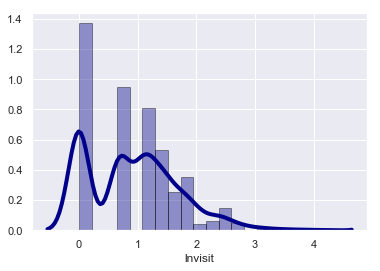

In [51]:
sns.distplot(df['lnvisit'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

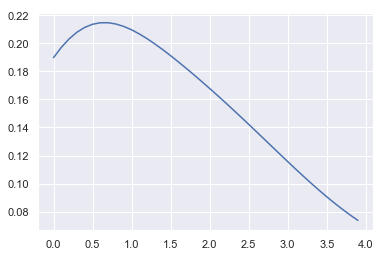

In [53]:
density = stats.kde.gaussian_kde(df['numvisit'])
x = np.arange(0., 4, .1)
plt.plot(x, density(x))
plt.show()

After the transformation, this plot looks less skewed than original one

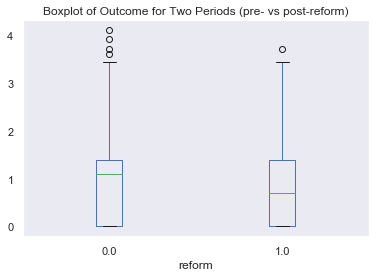

In [60]:
df.boxplot(column = 'lnvisit', by = 'reform',grid=False)
plt.title('Boxplot of Outcome for Two Periods (pre- vs post-reform)')
plt.suptitle("")
plt.show()

From boxplot, we can see it's not sysmmetric for both groups and obvious outliers

## Clean predictive variables and generate some interactions for subsequent models

#### Recode variables

In [67]:
df['hs'] = np.where(df['educ'] ==12, 1, 0)
df['sc'] = np.where(((df['educ'] >12) & (df['educ'] <16)), 1, 0)
df['coll'] = np.where(df['educ'] ==16, 1, 0)
df['grad'] =np.where(df['educ'] >16,1,0 )
df['age2'] = df['age'] **2
df['ageRef'] = df['age'] * df['reform']
df['badhRef'] = df['badh'] * df['reform']


In [68]:
df.head()

,id,numvisit,age,educ,married,badh,loginc,reform,summer,runif,...,rank,mx,lnvisit,hs,sc,coll,grad,age2,ageRef,badhRef
0,4.0,9.0,53.0,9.0,1.0,1.0,7.699212,0.0,0.0,0.351143,...,610.0,2165.0,2.302585,0,0,0,0,2809.0,0.0,0.0
1,7.0,40.0,48.0,10.5,0.0,1.0,7.057358,0.0,0.0,0.254096,...,394.0,2165.0,3.713572,0,0,0,0,2304.0,0.0,0.0
2,22.0,1.0,40.0,10.5,0.0,0.0,7.541466,0.0,0.0,0.593426,...,569.0,2165.0,0.693147,0,0,0,0,1600.0,0.0,0.0
3,22.0,1.0,42.0,10.5,1.0,0.0,7.331879,1.0,0.0,0.085072,...,569.0,2165.0,0.693147,0,0,0,0,1764.0,42.0,0.0
4,26.0,0.0,57.0,10.5,0.0,1.0,7.428922,0.0,0.0,0.836668,...,1941.0,2165.0,0.000000,0,0,0,0,3249.0,0.0,0.0


## Perform a one sample (paired) t- test on the difference between pre- and post- reform outcomes

#### Sketch of the approach:
1. Construct a varaible that is the negative value of the outcome for the pre-reform observations
2. Create a variable named 'ydiff', that, for each post-reform observations, is equal to the sum of hte outcome and the negative pre-reform outcome for the same subject. This is the difference score.
3. Determine which IDs have 2 (not 1) entry and select these IDSs with 2 entries in the t-test. We don't want to include 'singletons' in a one sample t test

In [76]:
df['negpre'] = df['reform'] -1
df['ydiff'] = df['reform'] + df['negpre']
df['lnvisit_1'] = df['lnvisit'].shift(1)
df['diff'] = df['lnvisit'] - df['lnvisit_1']

In [80]:
import scipy.stats
scipy.stats.ttest_1samp(df[df['ydiff'] ==1]['diff'], popmean =0)

Ttest_1sampResult(statistic=-0.8310855407087232, pvalue=0.4061256985626861)

Since the p value is too big here, we don't have enought evidence to reject the null hypothesis.

## I will use MLM model with a single random interception

In [132]:
import statsmodels.regression.mixed_linear_model as sm
model1 = sm.MixedLM.from_formula(
    "lnvisit ~ age+ reform+1", df, re_formula = '1', groups=df["id"])

In [133]:
result1 = model1.fit()                                                                                                           
                                                                                                                                             
print(model1.score(result1.params_object)) 

[0.01669116]


In [134]:
result1.params

Intercept    0.794480
age          0.004636
reform      -0.080736
Group Var    0.479283
dtype: float64

#### Check Residuals

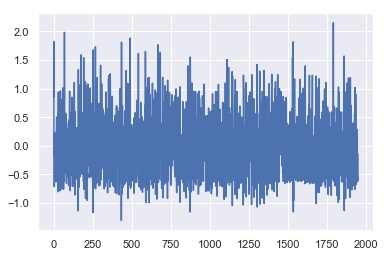

In [147]:
plt.plot(result1.resid)

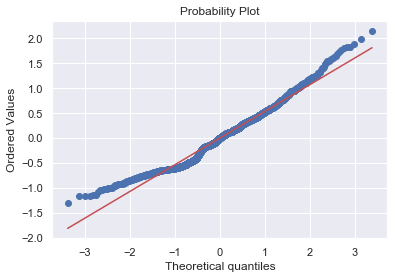

In [151]:
import pylab
scipy.stats.probplot(result1.resid, dist = 'norm', plot =pylab)
pylab.show()

### Use a scatterplot and lowess smooth to evaluate potential non-linearity in age,

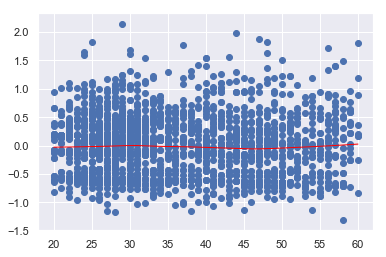

In [180]:
import statsmodels.api 
plt.scatter(df['age'], result1.resid)
smooth_lowess= statsmodels.api.nonparametric.lowess(result1.resid, df['age'], it=5, frac=0.5)
plt.plot(smooth_lowess[:,0],smooth_lowess[:,1],'red', linewidth =1)

The red line is not perfect linear. So slightly potential non-linearity

## Fit a new MLM by adding a quadratic in age to the prior model

In [181]:
model2 = sm.MixedLM.from_formula(
    "lnvisit ~ age + age2 + reform+1", df, re_formula = '1', groups=df["id"])
result2 = model2.fit()    

In [182]:
result2.params

Intercept    1.023886
age         -0.008284
age2         0.000167
reform      -0.079954
Group Var    0.478679
dtype: float64

In [183]:
result2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: lnvisit   
No. Observations: 1948    Method:             REML      
No. Groups:       1313    Scale:              0.4020    
Min. group size:  1       Likelihood:         -2239.0466
Max. group size:  2       Converged:          Yes       
Mean group size:  1.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.024    0.253  4.039 0.000  0.527  1.521
age           -0.008    0.014 -0.597 0.550 -0.035  0.019
age2           0.000    0.000  0.940 0.347 -0.000  0.001
reform        -0.080    0.031 -2.610 0.009 -0.140 -0.020
Group Var      0.192    0.052                           
========================================================

"""

P value for age2 variable is large. The quadratic age term is not significant at alpha = 0.05

## Fit a model with more covariates

In [193]:
model3 = sm.MixedLM.from_formula(
    "lnvisit ~ age+ reform + educ + married + loginc + summer", df, re_formula = '1', groups=df["id"])

In [195]:
result3 = model3.fit()  

In [197]:
result3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: lnvisit   
No. Observations: 1948    Method:             REML      
No. Groups:       1313    Scale:              0.4014    
Min. group size:  1       Likelihood:         -2240.4431
Max. group size:  2       Converged:          Yes       
Mean group size:  1.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.282    0.380  0.743 0.457 -0.462  1.027
age            0.004    0.002  2.183 0.029  0.000  0.008
reform        -0.082    0.031 -2.665 0.008 -0.142 -0.022
educ           0.005    0.008  0.581 0.561 -0.012  0.021
married        0.034    0.039  0.875 0.382 -0.043  0.111
loginc         0.060    0.051  1.170 0.242 -0.041  0.161
summer        -0.026    0.053 -0.483 0.629 -0.129  0.078
Group Var      0.193    0.052                           
========================================================

"""

### Use a Wald test to determine the value of adding the four new predictors.

In [199]:
hypothesis = '(educ = 0, married = 0, loginc= 0, summer =0)'

In [201]:
print(result3.wald_test(hypothesis))

<Wald test (chi2): statistic=[[3.26645083]], p-value=0.5142653376595496, df_denom=4>


The wald test at least one of the b(educ), b(married),b(loginc), b(summer) equals 0. Since the p value is too big, we cannot reject the null hypothesis.

## Fit models with more covariates

In [203]:
model4 = sm.MixedLM.from_formula(
    "lnvisit ~ age+ reform + educ + married + loginc + summer + badh", df, re_formula = '1', groups=df["id"])

In [204]:
result4 = model4.fit()   
result4.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: lnvisit   
No. Observations: 1948    Method:             REML      
No. Groups:       1313    Scale:              0.3855    
Min. group size:  1       Likelihood:         -2167.6888
Max. group size:  2       Converged:          Yes       
Mean group size:  1.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.172    0.364  0.473 0.636 -0.541  0.886
age            0.001    0.002  0.597 0.550 -0.002  0.005
reform        -0.065    0.030 -2.167 0.030 -0.123 -0.006
educ           0.008    0.008  1.005 0.315 -0.008  0.024
married        0.032    0.038  0.841 0.400 -0.042  0.105
loginc         0.074    0.049  1.506 0.132 -0.022  0.170
summer        -0.023    0.051 -0.450 0.653 -0.123  0.077
badh           0.733    0.059 12.420 0.000  0.617  0.848
Group Var      0.162    0.047                           
========================================================

"""

The p value for badh is very small, so we can say it is significant. Leave badh in all subsequent models.

## Substitute hs,sc,coll,grad for the single educ variable. Refit model and do a Wald test on the new predictors.

In [207]:
model5 = sm.MixedLM.from_formula(
    "lnvisit ~ age+ reform + hs +sc+coll+grad + married + loginc + summer + badh", df, re_formula = '1', groups=df["id"])

In [208]:
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: lnvisit   
No. Observations: 1948    Method:             REML      
No. Groups:       1313    Scale:              0.3860    
Min. group size:  1       Likelihood:         -2169.8752
Max. group size:  2       Converged:          Yes       
Mean group size:  1.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.181    0.371  0.488 0.626 -0.546  0.908
age            0.001    0.002  0.538 0.590 -0.003  0.005
reform        -0.064    0.030 -2.137 0.033 -0.123 -0.005
hs            -0.045    0.051 -0.885 0.376 -0.146  0.055
sc             0.003    0.059  0.055 0.956 -0.112  0.118
coll           0.139    0.142  0.981 0.327 -0.139  0.417
grad          -0.039    0.080 -0.482 0.630 -0.196  0.119
married        0.030    0.038  0.795 0.427 -0.044  0.104
loginc         0.086    0.048  1.784 0.074 -0.009  0.181
summer        -0.022    0.051 -0.440 0.660 -0.122  0.078
badh           0.729    0.059 12.345 0.000  0.613  0.845
Group Var      0.162    0.047                           
========================================================

"""

In [209]:
hypothesis_2 = '(hs = 0, sc = 0, coll= 0, grad =0)'

In [210]:
result5.wald_test(hypothesis_2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.10408839]], p-value=0.7166213146688021, df_denom=4>

Test at least one of the b(hs), b(sc), b(coll), b(grad) equals 0 The p value is very high, so we cannot reject the hypothesis.

## Return to the model with educ in this and all subsequent models.  Separately test two interaction terms (ageRef, badhRef) by adding them (separately)to the model.

In [214]:
model6 = sm.MixedLM.from_formula(
    "lnvisit ~ age+ reform + educ+ married + loginc + summer + badh + ageRef", df, re_formula = '1', groups=df["id"])

In [215]:
result6 = model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: lnvisit   
No. Observations: 1948    Method:             REML      
No. Groups:       1313    Scale:              0.3857    
Min. group size:  1       Likelihood:         -2172.0370
Max. group size:  2       Converged:          Yes       
Mean group size:  1.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.114    0.368  0.311 0.756 -0.606  0.835
age            0.003    0.002  1.158 0.247 -0.002  0.007
reform         0.049    0.107  0.459 0.646 -0.161  0.259
educ           0.008    0.008  1.020 0.308 -0.008  0.024
married        0.031    0.038  0.817 0.414 -0.043  0.104
loginc         0.074    0.049  1.504 0.133 -0.022  0.170
summer        -0.024    0.051 -0.474 0.635 -0.124  0.076
badh           0.732    0.059 12.415 0.000  0.617  0.848
ageRef        -0.003    0.003 -1.108 0.268 -0.009  0.002
Group Var      0.162    0.047                           
========================================================

"""

In [216]:
hypothsis_4= 'ageRef =0'
result6.wald_test(hypothsis_4)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.22719254]], p-value=0.2679537179673659, df_denom=1>

In [217]:
model7 = sm.MixedLM.from_formula(
    "lnvisit ~ age+ reform + educ+ married + loginc + summer + badh + badhRef", df, re_formula = '1', groups=df["id"])

In [218]:
result7= model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: lnvisit   
No. Observations: 1948    Method:             REML      
No. Groups:       1313    Scale:              0.3838    
Min. group size:  1       Likelihood:         -2167.5474
Max. group size:  2       Converged:          Yes       
Mean group size:  1.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.157    0.364  0.432 0.666 -0.556  0.871
age            0.001    0.002  0.590 0.555 -0.002  0.005
reform        -0.049    0.031 -1.563 0.118 -0.110  0.012
educ           0.008    0.008  0.988 0.323 -0.008  0.024
married        0.032    0.038  0.842 0.400 -0.042  0.105
loginc         0.075    0.049  1.530 0.126 -0.021  0.172
summer        -0.027    0.051 -0.521 0.603 -0.127  0.073
badh           0.819    0.079 10.413 0.000  0.664  0.973
badhRef       -0.195    0.118 -1.650 0.099 -0.426  0.037
Group Var      0.163    0.047                           
========================================================

"""

In [219]:
hypothesis_5 = 'badhRef = 0'
result7.wald_test(hypothesis_5)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.72101046]], p-value=0.09903530274181276, df_denom=1>

P values for ageRef and badhRef are too big.

So we will keep use model 4 for analysis


## Examine residuals from model 4 first using kdensity & then against *loginc* and *educ*(onx-axis)using scatterplot smooths

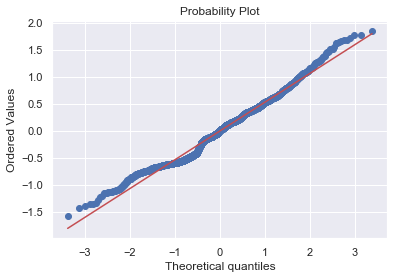

In [220]:
scipy.stats.probplot(result4.resid, dist = 'norm', plot =pylab)
pylab.show()

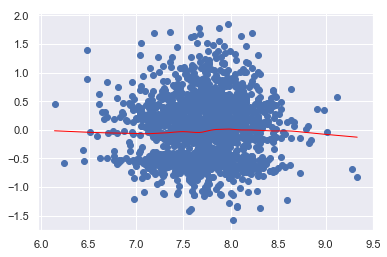

In [228]:
plt.scatter(df['loginc'], result4.resid)
smooth_lowess_2= statsmodels.api.nonparametric.lowess(result4.resid, df['loginc'], it=5, frac=0.5)
plt.plot(smooth_lowess_2[:,0],smooth_lowess_2[:,1],'red', linewidth =1)

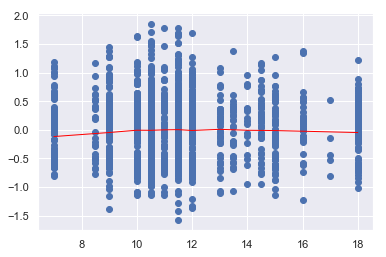

In [230]:
plt.scatter(df['educ'], result4.resid)
smooth_lowess_3= statsmodels.api.nonparametric.lowess(result4.resid, df['educ'], it=5, frac=0.5)
plt.plot(smooth_lowess_3[:,0],smooth_lowess_3[:,1],'red', linewidth =1)

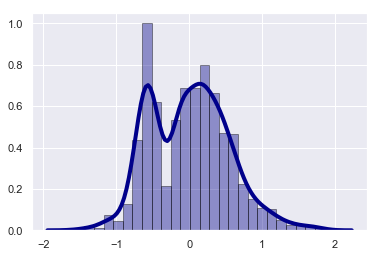

In [285]:
sns.distplot(result4.resid, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



The plots still don’t show perfectly normality. But it overall shows normally distributed. From the last two scatterplots, we see it doesn’t look like linearity against login but it shows relatively linearity against educ.

## Make predictions

In [233]:
test_df = pd.read_stata('/Users/YaoJunyan/Documents/NYU/Fall 2016/Growth Curve/Database/drvisits_testsamp.dta')

In [234]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 9 columns):
id          216 non-null float32
numvisit    216 non-null float32
age         216 non-null float32
educ        216 non-null float32
married     216 non-null float32
badh        216 non-null float32
loginc      216 non-null float32
reform      216 non-null float32
summer      216 non-null float32
dtypes: float32(9)
memory usage: 9.3 KB


In [277]:
model4 = sm.MixedLM.from_formula(
    "lnvisit ~ age+ reform + educ + married + loginc + summer + badh", df, re_formula = '1', groups=df["id"])

In [278]:
X= test_df[['age', 'reform', 'educ', 'married', 'loginc', 'summer', 'badh']]

In [279]:
pred_test = result4.predict(X)

In [280]:
sq_error = (df['numvisit']- np.exp(pred_test)) **2

In [281]:
np.mean(sq_error)

28.442087999734802